In [81]:
#import libararies
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Code clean-up

In [82]:
kickstarters_2018 = pd.read_csv('data/train.csv')

In [83]:
#Drop useless data
kickstarters_2018.dropna()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0
5,kkst1085176748,daily digest,I'm a fledgling videoblogger living in Brookly...,700.0,daily-digest,False,US,USD,1243815600,1243816219,1241050799,1241464468,14,0
6,kkst1468954715,iGoozex - Free iPhone app,I am an independent iPhone developer that beli...,250.0,igoozex-free-iphone-app,False,US,USD,1243872000,1243872028,1241725172,1241736308,2,0
7,kkst194050612,Drive A Faster Car 2.0,Drive A Faster Car (http://www.driveafastercar...,1000.0,drive-a-faster-car-20,False,US,USD,1244088000,1244088022,1241460541,1241470291,32,1
8,kkst708883590,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","Opening Friday, June 5 2009, on view through S...",5000.0,lostles-at-tinys-giant,False,US,USD,1244264400,1244264422,1241415164,1241480901,44,0
9,kkst890976740,Choose Your Own Adventure - A Robot Painting S...,This project is for a Choose Your Own Adventur...,3500.0,choose-your-own-adventure-a-robot-painting-series,False,US,USD,1244946540,1244946632,1242268157,1242273460,18,0


In [84]:
kickstarters_2018.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


# Data Analyse

In [85]:
#Check status
kickstarters_2018.groupby('final_status')['name'].count()

final_status
0    73565
1    34561
Name: name, dtype: int64

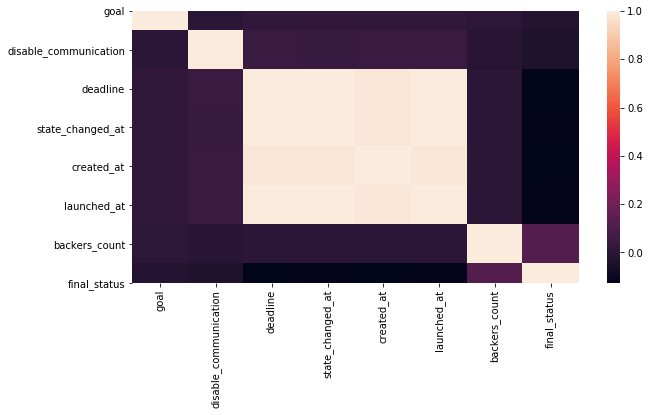

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(kickstarters_2018.corr())
plt.show()

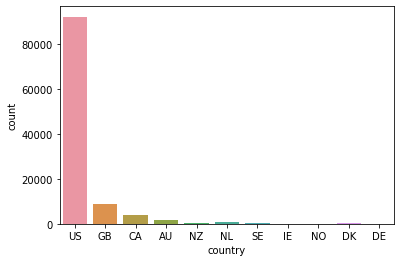

In [87]:
sns.countplot(kickstarters_2018['country'])

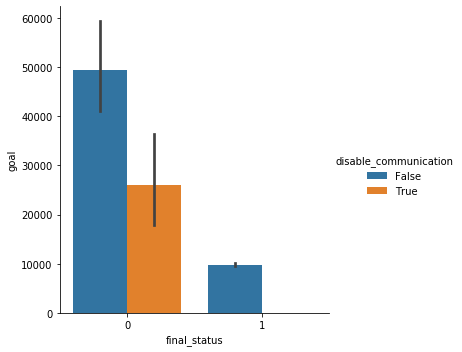

In [88]:
sns.catplot(x='final_status', y='goal',data=kickstarters_2018, hue='disable_communication',kind='bar')

# Machine learning

In [89]:
X = kickstarters_2018.iloc[:, [3, 5, 6, 7, 8, 9, 10, 11, 12]].values
y = kickstarters_2018.iloc[:, 13]

In [90]:

# Change true/false to 0 or 1
label_encoder_disable_com = LabelEncoder()
X[:, 1] = label_encoder_disable_com.fit_transform(X[:, 1])

# Change country_code to number
label_encoder_country = LabelEncoder()
X[:, 2] = label_encoder_country.fit_transform(X[:, 2])

# Change Currency name to number
label_encoder_currency = LabelEncoder()
X[:, 3] = label_encoder_currency.fit_transform(X[:, 3])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(86503, 9) (21626, 9)


In [92]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print('After feature scaling: ', X_train[10])

After feature scaling:  [-0.03015204 -0.05340358  0.39824381  0.39291103  1.07298798  1.07616148
  1.14109522  1.0752982   0.25563814]


In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

input_dim = int(X_train.shape[1])

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

Train on 77852 samples, validate on 8651 samples
Epoch 1/50
77852/77852 [==============================] - 3s 38us/step - loss: 0.4632 - acc: 0.7732 - val_loss: 0.3700 - val_acc: 0.8191
Epoch 2/50
77852/77852 [==============================] - 2s 28us/step - loss: 0.3637 - acc: 0.8219 - val_loss: 0.3421 - val_acc: 0.8335
Epoch 3/50
77852/77852 [==============================] - 2s 29us/step - loss: 0.3398 - acc: 0.8345 - val_loss: 0.3174 - val_acc: 0.8495
Epoch 4/50
77852/77852 [==============================] - 2s 27us/step - loss: 0.3294 - acc: 0.8412 - val_loss: 0.3059 - val_acc: 0.8538
Epoch 5/50
77852/77852 [==============================] - 2s 27us/step - loss: 0.3207 - acc: 0.8454 - val_loss: 0.2961 - val_acc: 0.8600
Epoch 6/50
77852/77852 [==============================] - 2s 27us/step - loss: 0.3155 - acc: 0.8483 - val_loss: 0.3157 - val_acc: 0.8468
Epoch 7/50
77852/77852 [==============================] - 2s 29us/step - loss: 0.3112 - acc: 0.8507 - val_loss: 0.2900 - val_acc:

# Validation

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()